In [1]:
from model import vonmises180_sample, OrientationWei, vonmises180
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import simpson

In [2]:
model = OrientationWei()

0.9985422749193956

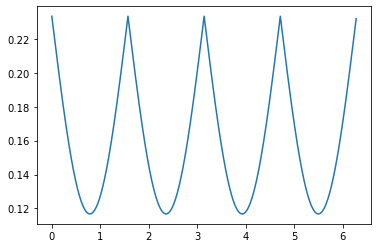

In [3]:
plt.plot(model.stim_grid, model.prior(model.stim_grid))
simpson(model.prior(model.stim_grid), model.stim_grid)

0.0

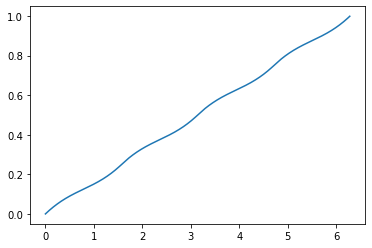

In [4]:
plt.plot(model.stim_grid, model.cdf(model.stim_grid))
# model.cdf(model.stim_grid[0])
np.sign(np.sin(0))
# simpson(model.prior(model.stim_grid), model.stim_grid)

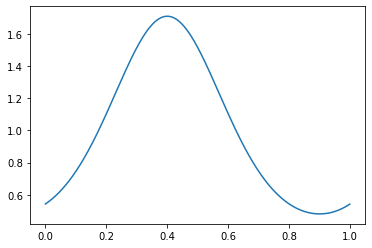

In [5]:
plt.plot(model.rep_grid, vonmises180(0.4,0.2,model.rep_grid))

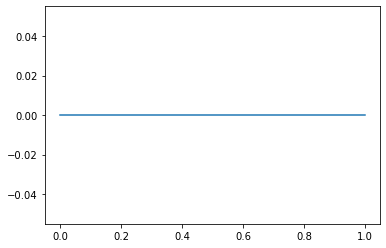

In [6]:
plt.plot(model.rep_grid, (model.rep_likelihood(0.4,model.rep_grid, 0.2)-vonmises180(0.4,0.2,model.rep_grid)).squeeze())

In [7]:
theta0 = 0.6*np.pi
sigma_rep = 0.1
norm=True

m = model.stim2rep(theta0)

theta_rep = model.rep_grid

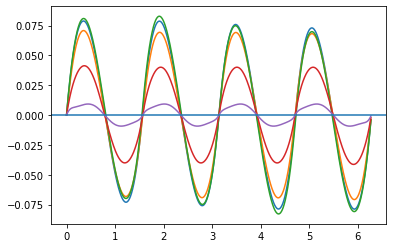

In [8]:
theta0 = np.pi

m = model.stim2rep(theta0)

# plt.plot(model.stim_grid_, model.subject_estimate_theta(model.rep_grid).squeeze())
# plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.8).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.2).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.1).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.3).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.05).squeeze() - model.stim_grid_[:-1])
plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.02).squeeze() - model.stim_grid_[:-1])

# plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=.0001).squeeze() - model.stim_grid_[:-1])
# plt.plot(model.stim_grid_[:-1], model.subject_estimate_theta(model.rep_grid[:-1], sigma_rep=1e-9).squeeze() - model.stim_grid_[:-1])
plt.axhline(.0)

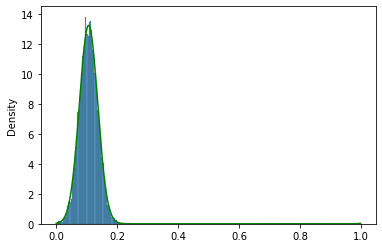

In [9]:
theta0 = .2 * np.pi
theta0_ = model.stim2rep(theta0)
sigma_rep = 0.03

samples_rep = vonmises180_sample(theta0_, sigma_rep, 10000)

sns.histplot(samples_rep, stat='density')

plt.plot(model.rep_grid, np.squeeze(model.rep_likelihood(theta0_, model.rep_grid, sigma_rep, norm=True)), c='green')

AttributeError: 'OrientationWei' object has no attribute 'stim_likelihood'

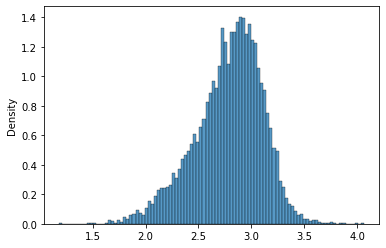

In [10]:
theta0 = 0.9 * np.pi
theta0_ = model.stim2rep(theta0)
sigma_rep = 0.05
samples_rep = vonmises180_sample(theta0_, sigma_rep, 10000)
samples_stim = model.rep2stim(samples_rep)

sns.histplot(samples_stim.squeeze(), stat='density', bins=100)

plt.plot(model.stim_grid_, np.squeeze(model.stim_likelihood(theta0_, model.rep_grid, sigma_rep)), c='green', lw=2)



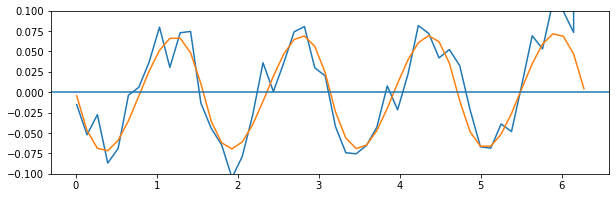

In [124]:
from numpy import mean


sigma_rep = .07
theta0 = np.linspace(.01, 2*np.pi-0.01, 50)
theta0_ = model.stim2rep(theta0)

samples_m = [vonmises180_sample(t0_, sigma_rep, 500) for t0_ in theta0_]
# estimates = [model.subject_estimate_theta(m) for m in samples_m]

estimates = model.subject_estimate_theta(np.array(samples_m)[:, :, np.newaxis], sigma_rep)
mean_simulated_estimates = [np.angle(np.mean(np.exp(1j*(est)))) % (np.pi*2.) for est in estimates]

plt.plot(theta0, theta0 - mean_simulated_estimates)

theta0_est = model.model_estimate_theta(theta0, sigma_rep).squeeze()
plt.plot(theta0, theta0 - theta0_est)

plt.ylim(-.1, .1)

plt.gcf().set_size_inches(10,3)
plt.axhline(0.0)

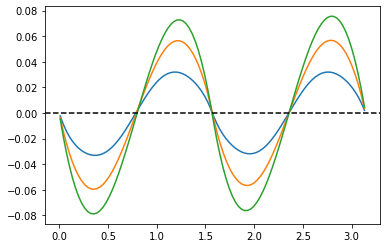

In [101]:
theta0 = np.linspace(.01, np.pi-0.01, 100)

for sigma_rep in [0.03, 0.05, 0.1]:
    theta0_est = model.model_estimate_theta(theta0, sigma_rep).squeeze()
    plt.plot(theta0, theta0 - theta0_est)

plt.axhline(0., c='k', ls='--')

In [ ]:
theta0 = .9*np.pi
theta0_ = model.stim2rep(theta0)

sigma_rep = 0.1

# For a given theta0, gets converted it to sensory space and then can have different posssible sensory representation coming from vonmises
samples_m = vonmises180_sample(theta0_, sigma_rep, 10000)

# Subject estimates a given posterior estimate for each m from this vonmises
estimates = model.subject_estimate_theta(np.array(samples_m), sigma_rep)

# There is a mean posterior estimate for the subject
mean_estimate = np.angle(np.mean(np.exp(1j*(estimates)))) % (np.pi*2.)
print(mean_estimate), print(theta0)

mean_estimate_model = model.model_estimate_theta(theta0, sigma_rep=sigma_rep)
print(mean_estimate_model)

# Histogram of the posterior estimates according to the subject
sns.histplot(estimates.squeeze(), stat='density', bins=100)
plt.axvline(mean_estimate, c='k', ls='-', lw=1)
plt.axvline(theta0, c='b', lw=2)
plt.axvline(mean_estimate_model, ls='--', lw=2, c='green')


# Model likelihood in stimulus space
ll = model.model_likelihood(theta0, sigma_rep=sigma_rep).squeeze()
# Model likelihood in stimulus space, already contains the prior basically
x, ll2 = model.rep2stim(model.rep_grid, ll)

plt.plot(x, ll2, c='orange', lw=4)


post = ll2*model.prior(model.stim_grid_)
post /= simpson(post, x)

plt.plot(x, post, c='orange', lw=2)

2.747432518236633
2.827433388230814
[[2.75231693]]


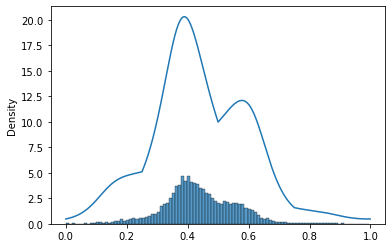

In [153]:
sns.histplot(model.stim2rep(estimates.squeeze()), stat='density', bins=100)
ll = ll/model.prior(model.stim_grid)
plt.plot(model.rep_grid, ll)

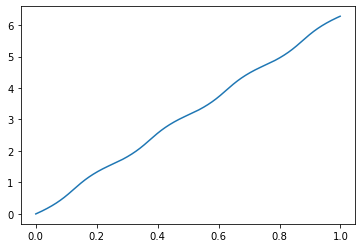

In [109]:
plt.plot(model.rep_grid, model.invcdf(model.rep_grid))

In [ ]:
simpson(ll, model.rep_grid)

In [96]:
simpson(ll, model.rep_grid)

1.0000000000000002

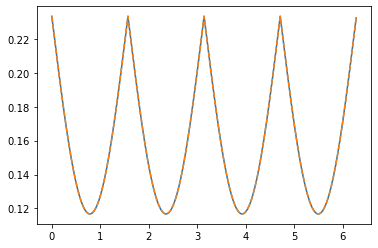

In [122]:
x, p = model.rep2stim(model.rep_grid, np.ones_like(model.rep_grid))
plt.plot(x, p)
plt.plot(x, model.prior(x), ls='--')